##**`About Dataset`**##

All Disney movies with their release dates, genre, rating, total gross and inflation adjusted gross(2016).
Disney has produced many movies, this data has all Disney movies till 2016.

In [26]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
di=pd.read_csv("/content/disney_movies.csv")

In [28]:
di.head()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251
1,Pinocchio,1940-02-09,Adventure,G,84300000,2188229052
2,Fantasia,1940-11-13,Musical,G,83320000,2187090808
3,Song of the South,1946-11-12,Adventure,G,65000000,1078510579
4,Cinderella,1950-02-15,Drama,G,85000000,920608730


In [29]:
di.tail()

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
574,The Light Between Oceans,2016-09-02,Drama,PG-13,12545979,12545979
575,Queen of Katwe,2016-09-23,Drama,PG,8874389,8874389
576,Doctor Strange,2016-11-04,Adventure,PG-13,232532923,232532923
577,Moana,2016-11-23,Adventure,PG,246082029,246082029
578,Rogue One: A Star Wars Story,2016-12-16,Adventure,PG-13,529483936,529483936


In [30]:
di.shape

(579, 6)

In [31]:
di.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   movie_title               579 non-null    object
 1   release_date              579 non-null    object
 2   genre                     562 non-null    object
 3   mpaa_rating               523 non-null    object
 4   total_gross               579 non-null    int64 
 5   inflation_adjusted_gross  579 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [32]:
di.describe()

,total_gross,inflation_adjusted_gross
count,5.790000e+02,5.790000e+02
mean,6.470179e+07,1.187625e+08
std,9.301301e+07,2.860853e+08
min,0.000000e+00,0.000000e+00
25%,1.278886e+07,2.274123e+07
50%,3.070245e+07,5.515978e+07
75%,7.570903e+07,1.192020e+08
max,9.366622e+08,5.228953e+09


In [33]:
di.isnull().sum()

movie_title                  0
release_date                 0
genre                       17
mpaa_rating                 56
total_gross                  0
inflation_adjusted_gross     0
dtype: int64

In [34]:
di["genre"]=di["genre"].fillna("Not information")

In [35]:
di["genre"]

0        Musical
1      Adventure
2        Musical
3      Adventure
4          Drama
         ...    
574        Drama
575        Drama
576    Adventure
577    Adventure
578    Adventure
Name: genre, Length: 579, dtype: object

In [36]:
di["mpaa_rating"]=di["mpaa_rating"].fillna("Not information")

In [37]:
di["mpaa_rating"]

0          G
1          G
2          G
3          G
4          G
       ...  
574    PG-13
575       PG
576    PG-13
577       PG
578    PG-13
Name: mpaa_rating, Length: 579, dtype: object

In [38]:
di.isnull().sum()

movie_title                 0
release_date                0
genre                       0
mpaa_rating                 0
total_gross                 0
inflation_adjusted_gross    0
dtype: int64

In [39]:
di["mpaa_rating"].unique()

array(['G', 'Not information', 'Not Rated', 'PG', 'R', 'PG-13'],
      dtype=object)

In [40]:
n=di.groupby(["mpaa_rating"]).size().reset_index(name="counts")
n

,mpaa_rating,counts
0,G,86
1,Not Rated,3
2,Not information,56
3,PG,187
4,PG-13,145
5,R,102


In [41]:
pieChart=px.pie(n,values="counts",names="mpaa_rating",
                title="Distribution for mpaa_rating",
                color_discrete_sequence=px.colors.qualitative.Set2)
pieChart.show()

In [42]:
m=di.groupby(["genre"]).size().reset_index(name="counts")
m

,genre,counts
0,Action,40
1,Adventure,129
2,Black Comedy,3
3,Comedy,182
4,Concert/Performance,2
5,Documentary,16
6,Drama,114
7,Horror,6
8,Musical,16
9,Not information,17


In [43]:
pieChart1=px.pie(m,values="counts",names="genre",
                title="Distribution for genre",
                color_discrete_sequence=px.colors.qualitative.Set2)
pieChart1.show()

In [44]:
di.head(1)

,movie_title,release_date,genre,mpaa_rating,total_gross,inflation_adjusted_gross
0,Snow White and the Seven Dwarfs,1937-12-21,Musical,G,184925485,5228953251


m.sort_values(by=['counts'], ascending=False): هذا الجزء يستخدم الدالة sort_values() من مكتبة pandas لفرز البيانات. يقوم بفرز DataFrame الذي يُسمى m باستخدام العمود المسمى 'counts'. الـby=['counts'] يحدد أن الفرز سيتم استنادًا إلى القيم الموجودة في عمود 'counts'. ascending=False يعني أن الفرز سيكون بترتيب تنازلي، أي أن القيم الأعلى ستكون أولى.

النتيجة ستكون DataFrame مُعدل حيث تكون الصفوف مرتبة بناءً على القيم في العمود 'counts' من الأعلى إلى الأقل.

In [45]:
di.columns

Index(['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross'],
      dtype='object')

Variables pairplot:


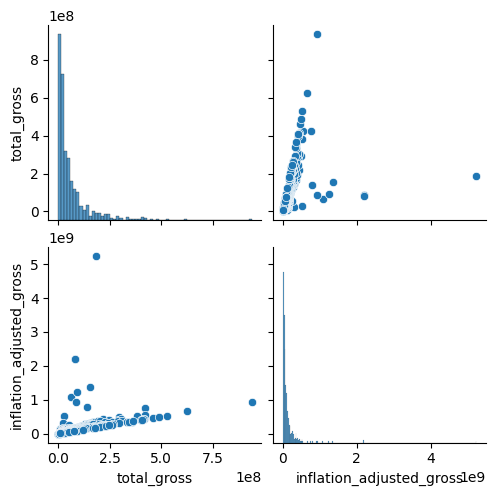

In [46]:
print('Variables pairplot:')
variables = ['movie_title', 'release_date', 'genre', 'mpaa_rating', 'total_gross',
       'inflation_adjusted_gross']
sns_plot = sns.pairplot(di[variables])
plt.show()

In [47]:
genres=m.sort_values(by=["counts"],ascending=False)

In [48]:
top_10_genres=genres.head(10)

In [49]:
top_10_genres=top_10_genres.sort_values(by=["counts"])

In [50]:
top_10_genres

,genre,counts
12,Western,7
5,Documentary,16
8,Musical,16
9,Not information,17
10,Romantic Comedy,23
11,Thriller/Suspense,24
0,Action,40
6,Drama,114
1,Adventure,129
3,Comedy,182


In [51]:
figure=px.bar(top_10_genres,x="genre",y="counts",title='Top 10 Genres on Disneyland movies')
figure.show()